In [5]:
# Import necessary libraries [cite: 63, 64]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'filename.csv' with the actual name of your file)
# df stands for "Data Frame"
df = pd.read_csv('data/phishing_email.csv') 

# Check the structure [cite: 26]
print("First 5 rows:")
print(df.head())

print("\nData Info (Columns & Types):")
print(df.info())

# Check the balance of spam vs. legitimate emails [cite: 27]
print("\nLabel Distribution:")
print(df['label'].value_counts()) # Adjust 'label' if the column name is different

First 5 rows:
                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0

Data Info (Columns & Types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None

Label Distribution:
label
1    42891
0    39595
Name: count, dtype: int64


In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# 2. Load Dataset
df = pd.read_csv('data/phishing_email.csv')

# Drop any rows that are missing data (just in case)
df = df.dropna()

# Check the new shape
print(f"Dataset ready. Total emails: {df.shape[0]}")
print(df.head())

Dataset ready. Total emails: 82486
                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0


In [8]:
# 3. Convert Text to Numbers (TF-IDF)
# This looks for the top 5000 most important words distinguishing Spam from Ham
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# X is our data (the text), y is our target (0 or 1)
X = tfidf.fit_transform(df['text_combined']).toarray()
y = df['label']

print("Text converted to numbers successfully.")
print(f"Shape of Data Features: {X.shape}")

Text converted to numbers successfully.
Shape of Data Features: (82486, 5000)


In [9]:
# 4. Split Data
# test_size=0.3 means 30% for testing. random_state=42 ensures consistent results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 57740
Testing set size: 24746


In [10]:
# 5. Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


Model Accuracy on Validation Set: 98.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11889
           1       0.98      0.99      0.98     12857

    accuracy                           0.98     24746
   macro avg       0.98      0.98      0.98     24746
weighted avg       0.98      0.98      0.98     24746



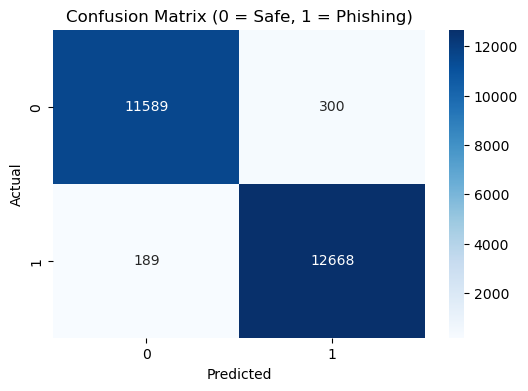

In [11]:
# 6. Evaluate
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Validation Set: {accuracy * 100:.2f}%")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (Visualizing the results)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (0 = Safe, 1 = Phishing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Add this to the bottom of your notebook for the presentation

def predict_email(text):
    # 1. Vectorize the text (convert to numbers)
    text_vectorized = tfidf.transform([text]).toarray()
    
    # 2. Make prediction
    prediction = model.predict(text_vectorized)[0]
    
    # 3. Output result
    if prediction == 1:
        return "⚠️ WARNING: PHISHING DETECTED!"
    else:
        return "✅ Email is Safe."

# Test it live!
input_email = "URGENT: Your account is suspended. Click here to verify: http://bit.ly/fake"
print(predict_email(input_email))

⚠️ WARNING: PHISHING DETECTED!
